In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dftrain = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Financial/train_data.csv")
dftest = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Financial/test_data.csv")

In [ ]:
dftrain.head()

In [ ]:
dftrain.shape

(227845, 30)

In [ ]:
#Apply Standard Scaling for features
from sklearn.preprocessing import StandardScaler
dftrain['Amount'] = StandardScaler().fit_transform(dftrain['Amount'].values.reshape(-1,1))
dftrain.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,-0.156600,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,-0.288523,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,-0.352771,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,-0.313351,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,-0.195737,0


In [ ]:
#Drop the columns which are unnecessary
dftrain = dftrain.drop(columns=['Time'],axis=1)
#Independent Features
X = dftrain.drop(['Class'],axis=1)
#Dependent Features
y = dftrain['Class']

In [ ]:
#Split the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#Apply Sequential model
model = Sequential([
    #Apply Input layer of 18 neurons  activation function relu
    Dense(units=18, input_dim = 29,activation='relu'),
    #Apply hidden layer of 26 neurons  activation function relu
    Dense(units=26,activation='relu'),
    #Apply Dropout layer
    Dropout(0.5),
   # Dense(22,activation='relu'),
    #Dense(22,activation='relu'),
    #Apply output layer of activation function sigmoid
    Dense(1,activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                494       
_________________________________________________________________
dropout (Dropout)            (None, 26)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
15950/15950 [==============================] - 41s 3ms/step - loss: 0.0123 - accuracy: 0.9976
Epoch 2/10
15950/15950 [==============================] - 40s 3ms/step - loss: 0.0048 - accuracy: 0.9992
Epoch 3/10
15950/15950 [==============================] - 40s 3ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 4/10
15950/15950 [==============================] - 40s 3ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 5/10
15950/15950 [==============================] - 41s 3ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 6/10
15950/15950 [==============================] - 41s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 7/10
15950/15950 [==============================] - 40s 3ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 8/10
15950/15950 [==============================] - 40s 3ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 9/10
15950/15950 [==============================] - 40s 3ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/10
15950/15950 [==============================

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

2137/2137 [==============================] - 4s 2ms/step - loss: 0.0031 - accuracy: 0.9996
Test Accuracy: 99.96%
Test Loss: 0.0030737726483494043


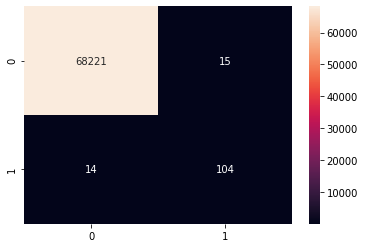

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [ ]:
X.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,-0.156600
1,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,-0.288523
2,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,-0.352771
3,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,-0.313351
4,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,-0.195737
5,-6.341667,1.192815,-3.686579,-2.754006,-5.007164,3.988118,1.693606,-13.577522,2.557965,-0.931438,-1.189333,0.762725,-0.517857,0.067279,-0.099498,0.837768,-0.156679,-0.402600,-0.238742,-7.171342,9.779321,-3.660198,-1.507217,-0.179185,0.002092,-0.019168,3.611243,-0.894494,5.435550
6,-0.463928,0.204745,2.795734,1.546200,-0.720374,1.108212,-0.581133,0.544075,1.099843,-0.653523,-1.420838,0.427211,-0.436201,-1.055012,-1.225903,-1.179268,0.846734,-0.374502,0.623190,-0.052393,0.094431,0.788161,-0.100344,0.126248,-0.461584,-0.200985,0.280168,0.180046,-0.312061
7,-1.394619,0.554224,-0.617805,-0.313706,2.157413,3.537534,-0.567305,1.380888,-0.112291,0.107269,-0.637728,0.099510,-0.062533,0.254824,0.318805,-0.335245,0.052870,0.048783,1.654699,0.336595,-0.196300,-0.546172,-0.124758,1.046780,-0.089474,0.363674,0.215692,0.225698,-0.259744
8,-2.121785,-1.518485,2.667942,-2.458839,-1.414952,0.807935,-1.870160,0.516477,-0.553359,0.645799,-0.514941,0.618199,1.461221,-2.116306,-3.244732,-0.345286,0.368870,0.699637,0.031145,-0.684797,-0.079591,0.659885,-1.000976,-0.212991,0.420722,-0.019645,-0.482792,-0.407780,-0.243944
9,-2.254788,-0.955967,0.590596,0.114744,-5.876531,3.364858,6.365904,-1.252960,0.243849,-1.637022,-0.626434,0.105457,0.859541,-1.306715,-0.724693,0.553933,-0.590110,-0.471491,-0.291435,-0.772127,-0.601908,-0.092918,0.517855,0.534361,0.494493,0.301414,0.507071,-0.560888,5.104634


In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12,input_dim=29, activation='relu')) 
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:

from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model)

In [ ]:
	#Random seed
seed = 7
np.random.seed(seed)

# define the grid search parameters

batch_size=[1000,5000]#add 50,100 etc
epochs=[1,10]#add 50,100 etc
optimizer = ['SGD','RMSprop','Adagrad','Adam']
#model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X,y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
228/228 [==============================] - 1s 3ms/step - loss: 0.5606 - accuracy: 0.7271
Epoch 2/10
228/228 [==============================] - 1s 3ms/step - loss: 0.1653 - accuracy: 0.9970
Epoch 3/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9990
Epoch 4/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9991
Epoch 5/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9992
Epoch 6/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9992
Epoch 7/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.9992
Epoch 8/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9992
Epoch 9/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0081 - accuracy: 0.9993
Epoch 10/10
228/228 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9993

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999307 using {'batch_size': 1000, 'epochs': 10}
0.982453 (0.016113) with: {'batch_size': 1000, 'epochs': 1}
0.999307 (0.000030) with: {'batch_size': 1000, 'epochs': 10}
0.688806 (0.168766) with: {'batch_size': 5000, 'epochs': 1}
0.998301 (0.001281) with: {'batch_size': 5000, 'epochs': 10}


In [ ]:
The batch size of 1000 and 10 epochs has the best accuracy score of 99.99%.
For now I have kept epoch very small because it was taking time. We should test higher values also.

AttributeError: ignored